# Solving a Fixed-Point Equation

Assume we want to find a solution of the equation
$$ x = \cos(x).  $$
As a first step, we would try to visualize the situation and plot both the function $y = \cos(x)$ and the line $y = x$.  This is done in the following cell:

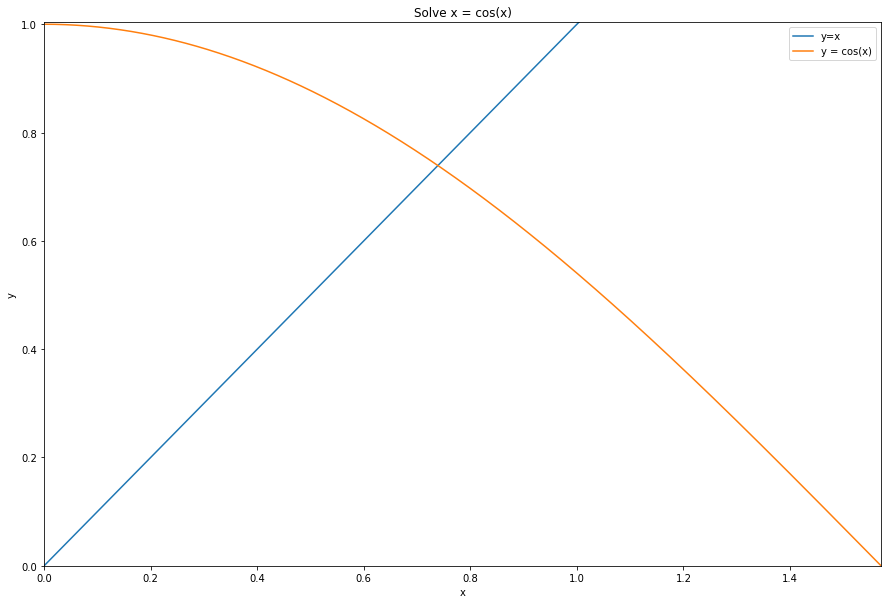

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import math

plt.rcParams['figure.figsize'] = [15, 10]
n = 1000
x = [0.5 * math.pi * i / 1000 for i in range(1001)]
y = [math.cos(0.5 * math.pi * i / 1000) for i in range(1001)]
plt.margins(0.00)
plt.plot(x[:640], x[:640], label="y=x")
plt.plot(x, y, label="y = cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Solve x = cos(x)")
plt.savefig("xEqualsCosX.pdf")

The figure above clearly shows that the line $y = x$ intersects the function $y = \cos(x)$ at some point $\bar{x}$ that lies somewhere in the intervall $[0.6, 0.8]$.  In order to compute $\bar{x}$, we try the following *fixed-point iteration*.
<ol>
    <li> We initialize $x_0$ with the value $1.0$. </li>
    <li> We define $x_{n+1} := \cos(x_n)$.
</ol>

Our hope is that the sequence $(x_n)_{n\in\mathbb{N}}$ converges to the solution $\bar{x}$, i.e. we hope that
$$ \lim\limits_{n\rightarrow\infty} x_n = \bar{x}. $$
Why should this be true?  Well let us assume that the limit exists and define
$$ \bar{x} := \lim\limits_{n\rightarrow\infty} x_n. $$
Then we have the following:
$$
  \begin{array}{lcl}
  \cos\bigl(\bar{x}\bigr) & = & \cos\Bigl(\lim\limits_{n\rightarrow\infty} x_n\Bigr) \\
                          & = & \lim\limits_{n\rightarrow\infty} \cos(x_n)           \\
                          & = & \lim\limits_{n\rightarrow\infty} x_{n+1}       \\
                          & = & \lim\limits_{n\rightarrow\infty} x_{n}         \\
                          & = & \bar{x}
  \end{array}
$$

Therefore, if the sequence converges to some limit, the limit is indeed a solution of the equation $x = \cos(x)$. There question whether the sequence does converge is decided *experimentally* as follows:

In [2]:
import math

x     = 1.0
old_x = 0.0
i     = 1
while abs(x - old_x) >= 4.0E-16:
    old_x = x
    x = math.cos(x)
    print(f'{i} : {x}')
    i += 1

1 : 0.5403023058681398
2 : 0.8575532158463934
3 : 0.6542897904977791
4 : 0.7934803587425656
5 : 0.7013687736227565
6 : 0.7639596829006542
7 : 0.7221024250267079
8 : 0.7504177617637604
9 : 0.7314040424225099
10 : 0.7442373549005569
11 : 0.7356047404363473
12 : 0.7414250866101093
13 : 0.7375068905132427
14 : 0.7401473355678758
15 : 0.7383692041223231
16 : 0.7395672022122561
17 : 0.7387603198742112
18 : 0.739303892396906
19 : 0.7389377567153443
20 : 0.7391843997714937
21 : 0.7390182624274122
22 : 0.7391301765296711
23 : 0.7390547907469174
24 : 0.7391055719265363
25 : 0.7390713652989449
26 : 0.7390944073790913
27 : 0.739078885994992
28 : 0.7390893414033928
29 : 0.7390822985224023
30 : 0.7390870426953322
31 : 0.7390838469650002
32 : 0.7390859996481299
33 : 0.7390845495752126
34 : 0.7390855263619245
35 : 0.7390848683867142
36 : 0.7390853116067619
37 : 0.7390850130484203
38 : 0.739085214160917
39 : 0.739085078689123
40 : 0.7390851699445544
41 : 0.7390851084737986
42 : 0.7390851498812395
43 : 

It seems that the sequence $(x_n)_{n\in\mathbb{N}}$ does indeed converge and the solution $\bar{x}$ to the equation $x=\cos(x)$ satisfies 
$$ \bar{x} \approx 0.739085133215161. $$
Furthermore, the limit $\bar{x}$ does indeed satisfy the equation $\cos(\bar{x}) = \bar{x}$:

In [3]:
x

0.7390851332151608

In [4]:
math.cos(x)

0.7390851332151605

In [5]:
x - math.cos(x)

3.3306690738754696e-16

The tiny difference between <tt>x</tt> and <tt>cos(x)</tt> is due to rounding errors.

Let us try to generalize this approach.  The function <tt>solve</tt> shown below takes two arguments:
<ol>
<li>The first argument <tt>f</tt> is a real valued function that takes a single real valued argument.</li>
<li>The second argument <tt>x0</tt> is the start value of the fixed-point iteration.</li>
</ol>
The function tries to solve the equation:
$$x = f(x) $$

This is done by defining a sequence 
<ul>
<li>$x_1 = f(\texttt{x0})$,</li> 
<li>$x_2 = f(x_1)$, and, in general,</li> 
<li>$x_{n+1} = f(x_n)$.</li>
</ul>
If this sequence converges, i.e. if the absolute value of the difference $x_{n+1} - x_n$ is less than
$10^{-15}$, then the value $x_{n+1}$ is returned.  If the function does not converge within $10000$ steps, <tt>None</tt> is 
returned instead.

In [6]:
def solve(f, x0):
    """
    Solve the equation f(x) = x using a fixed point iteration.
    x0 is the start value.
    """
    x = x0
    for n in range(10000):  # at most 10000 iterations
        oldX = x;
        x    = f(x);
        if abs(x - oldX) < 1.0e-15: 
            return x;
 

In [7]:
print("solution to x = cos(x): ", solve(math.cos, 0));

solution to x = cos(x):  0.7390851332151603


In [8]:
print("solution to x = 1/(1+x):", solve(lambda x: 1/(1+x), 0));

solution to x = 1/(1+x): 0.6180339887498948
